## Question 2: Predicting Income >$50k or not

## First step is to import data and modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns
sns.set()

adultp = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/adult_preprocessed.csv")
adult = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/adult.csv")
adult.head()

## What is the shape of my data set?

In [ ]:
adult.shape

The adult dataset contains 32,561 records with 15 variables

# How many records are under each category of variable?

Display the results as bar graphs with count of each category

In [ ]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = 3
for i, column in enumerate(adult.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if adult.dtypes[column] == np.object:
        adult[column].value_counts().plot(kind="bar", axes=ax)
    else:
        adult[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.75, wspace=0.25)

I want to determine which variables are objects and which are numerical

In [ ]:
adult_cat=adult.select_dtypes(include=['object']).copy()
adult_cat.head()

To perform some exploratory data analysis on this dataset, the categorical variables need to be encoded as numerical in order to process.
I used the LabelEnocder feature of scikit-learn.  This process normalizes labels so that they contain only values between 0 and n_classes-1.
For analysis I used the provided preprocessed dataset.

In [ ]:
def number_encode_features(adult):
    result = adult.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders
encoded_data, _ = number_encode_features(adult)
encoded_data.head()

Now that my variables have all been encoded, view mean salary based on some selected variables

In [ ]:
encoded_data.groupby('sex').salary.mean()

In [ ]:
encoded_data.groupby('race').salary.mean()

In [72]:
encoded_data.groupby('native_country').salary.mean()

native_country
0     0.250429
1     0.368421
2     0.322314
3     0.266667
4     0.033898
5     0.263158
6     0.028571
7     0.142857
8     0.084906
9     0.333333
10    0.413793
11    0.321168
12    0.275862
13    0.046875
14    0.090909
15    0.000000
16    0.076923
17    0.300000
18    0.230769
19    0.400000
20    0.418605
21    0.208333
22    0.342466
23    0.123457
24    0.387097
25    0.111111
26    0.051322
27    0.058824
28    0.000000
29    0.064516
30    0.308081
31    0.200000
32    0.108108
33    0.105263
34    0.250000
35    0.200000
36    0.392157
37    0.166667
38    0.105263
39    0.245835
40    0.074627
41    0.375000
Name: salary, dtype: float64

It appears there is correlation between the variables and salary.

I have the variables encoded but also need to encode the target 'salary'

In [73]:
adultp['salary'] = adultp.salary.map({'<=50K':0,'>50K':1})

# Split the data into training and testing sets
I will use the provided dummy coded version

In [74]:
X=adultp.drop('salary',axis=1)
y=adultp.salary
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

# Model Testing
Now that data has been split into training and testing sets. I will use different classification models on the data and report metrics to determine the best fitting model
Models to try include Logisitic Regression, Decision Tree Classifier, Random Forest Classifier, K Nearest Neighbor, Naive Bayes, Neural Network and Support Vector Machine.

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.79
Accuracy of Logistic regression classifier on test set: 0.81


In [76]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=8).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.86
Accuracy of Decision Tree classifier on test set: 0.86


Plotting RMSE vs max tree depth to determine optimal depth

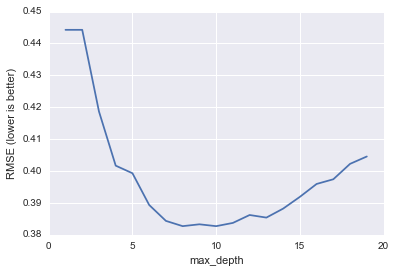

In [77]:
from sklearn.model_selection import cross_val_score
max_depth_range = range(1, 20)
RMSE_scores = []
for depth in max_depth_range:
    treereg = DecisionTreeClassifier(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')   
plt.grid(True)

Checking range of max depth shows the optimal depth is 8 for the best accuracy

In [78]:
from sklearn.ensemble import RandomForestClassifier
fclf=RandomForestClassifier(max_depth=20).fit(X_train,y_train)
print('Accuracy of Decision Forest classifier on training set: {:.2f}'
     .format(fclf.score(X_train, y_train)))
print('Accuracy of Decision Forest classifier on test set: {:.2f}'
     .format(fclf.score(X_test, y_test)))

Accuracy of Decision Forest classifier on training set: 0.90
Accuracy of Decision Forest classifier on test set: 0.86


The Random Forest Classifier will be tuned to find the optimal max depth by finding the minimum RMSE.

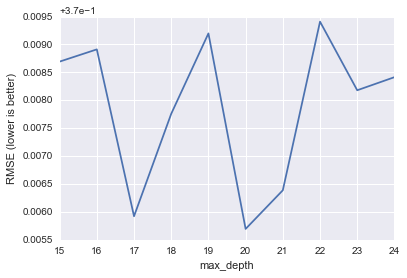

In [79]:
from sklearn.model_selection import cross_val_score
max_depth_range = range(15, 25)
RMSE_scores = []
for depth in max_depth_range:
    forestreg = RandomForestClassifier(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(forestreg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')   
plt.grid(True)

A max depth of 20 produced the lowest RMSE and will used in the Random Forest Classifier.

Trying out the K Nearest Neighbors model.
First with 10 neighbors and then with 500 neighbors

In [80]:
#10 neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.81


In [81]:
#500 neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 500)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.78


I will run a range of k values and plot against accuracy. 
Then cross validation will be performed to find the optimal n.

In [ ]:
#test a range of n values
k_range = range(1,500)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('n_neighbors vs. Accuracy')

It appears the optimal K is somewhere between 10-50.  I will run 10 fold cross validation on odd n_neighbors fomr 1-50 to find the optimal n.

In [ ]:
from sklearn.model_selection import cross_val_score
myList = list(range(1,50))
neighbors = filter(lambda x: x % 2 != 0, myList)
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

The optimal number of neighbors is 23. I will use this in my model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
print('Accuracy of Naive Bayes classifier on training set: {:.2f}'
     .format(nb.score(X_train, y_train)))
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'
     .format(nb.score(X_test, y_test)))

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(solver='lbfgs')
mlpc.fit(X_train,y_train)
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(mlpc.score(X_train, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(mlpc.score(X_test, y_test)))

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

# Model Performance Metrics

In [ ]:
y_pred_class = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.confusion_matrix(y_test, y_pred_class)
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
print 'True Positives:', TP
print 'True Negatives:', TN
print 'False Positives:', FP
print 'False Negatives:', FN

In [ ]:
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.confusion_matrix(y_test, y_pred_class)

In [ ]:
y_pred_class = fclf.predict(X_test)
y_pred_prob = fclf.predict_proba(X_test)[:, 1]
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.confusion_matrix(y_test, y_pred_class)
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
print 'True Positives:', TP
print 'True Negatives:', TN
print 'False Positives:', FP
print 'False Negatives:', FN

In [ ]:
y_pred_class = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:, 1]
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.confusion_matrix(y_test, y_pred_class)

In [ ]:
y_pred_class = nb.predict(X_test)
y_pred_prob = nb.predict_proba(X_test)[:, 1]
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.confusion_matrix(y_test, y_pred_class)

In [ ]:
y_pred_class = mlpc.predict(X_test)
y_pred_prob = mlpc.predict_proba(X_test)[:, 1]
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.confusion_matrix(y_test, y_pred_class)
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
print 'True Positives:', TP
print 'True Negatives:', TN
print 'False Positives:', FP
print 'False Negatives:', FN

In [ ]:
y_pred_class = svc.predict(X_test)
#y_pred_prob = svc.predict_proba(X_test)[:, 1]
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.roc_auc_score(y_test, y_pred_class)
print metrics.confusion_matrix(y_test, y_pred_class)

The Random Forest Classifier had the best accuracy score, predicting 86% of the y-test data correctly and having the highest ROC area under the curve score.

Comparing the confusion matrices, there was more negatives predicted, which is expected. Looking at the data there were far more profiles with less than 50K salaries in the data.  It is interesting how few >50K predictions were made with Neural Network, and in particular Support Vector Machine.

Comparing Random forest vs. Neural Network, RF made 1060 true positives and NN made only 41.  NN also made more false negative predictions.